## Exploratory Data Analysis - Global Terrorism
```
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?
```

## Task - 4  Spark Foundation

### Author: Karan Doke
Dataset: https://bit.ly/2TK5Xn5

### Importing all the libraries required for analysis

In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Importing Dataset
The data string is of latin1 encoding instead of UTF-8 encoding

In [2]:
data=pd.read_csv(r"E:/INTERNSHIP/SPARK FOUNDATION INTERNSHIP/Terrorism Data Analysis/globalterrorismdb.csv",encoding='latin1')
print("Data has been successfully imported")
data.head()

C:\Users\HP\.conda\envs\spyder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Feature Engineering

### Check the names of all the columns and select out all the important columns which are needed in analysis.


In [3]:
data.shape

(181691, 135)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [7]:
#rename the columns
data.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'success':'Success','suicide':'Suicide','provstate':'state','propvalue':'Propvalue',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualities"]=data["Killed"]+data["Wounded"]

In [9]:
# filtering out the important data in whole dataset those I'm using further processing.
data=data[['EventID','Year','Month','Day','Country','state','Region','city','Success','Suicide','Propvalue','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

In [10]:
data.head()

,EventID,Year,Month,Day,Country,state,Region,city,Success,Suicide,...,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1,0,...,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,1,0,...,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1,0,...,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,1,0,...,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,1,0,...,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [11]:
data.shape

(181691, 23)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   EventID      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   Success      181691 non-null  int64  
 9   Suicide      181691 non-null  int64  
 10  Propvalue    38989 non-null   float64
 11  latitude     177135 non-null  float64
 12  longitude    177134 non-null  float64
 13  AttackType   181691 non-null  object 
 14  Killed       181691 non-null  float64
 15  Wounded      181691 non-null  float64
 16  Target       181055 non-null  object 
 17  Summary      115562 non-null  object 
 18  Group        181691 non-

In [13]:
data.isnull().sum() # data missing

EventID             0
Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
Success             0
Suicide             0
Propvalue      142702
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities         0
dtype: int64

In [14]:
data.describe()

,EventID,Year,Month,Day,Success,Suicide,Propvalue,latitude,longitude,Killed,Wounded,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,3.898900e+04,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.889598,0.036507,2.088119e+05,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,0.313391,0.187549,1.552463e+07,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,1.000000,0.000000,-9.900000e+01,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,1.000000,0.000000,-9.900000e+01,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,1.000000,0.000000,1.000000e+03,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,2.700000e+09,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Observation
```
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 9574
```

## Exploratory Data Analysis - EDA

In [70]:
# Total Number of people Casualities in terror attack
CasualitiesData = data.loc[:,'Casualities']
print('Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(CasualitiesData.dropna())))# drop the NaN values

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737


In [71]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Total number of people Killed due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(killData.dropna())))# drop the NaN values

Total number of people Killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868


In [72]:
# Total Number of people Wounded in terror attack
WoundedData = data.loc[:,'Wounded']
print('Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(WoundedData.dropna())))# drop the NaN values

Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world : 523869


In [73]:
# attackData
attackData = data.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [74]:
countryData = data.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


### 1. Year wise Attacks

#### i. Number of Attacks in each Year

C:\Users\HP\.conda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


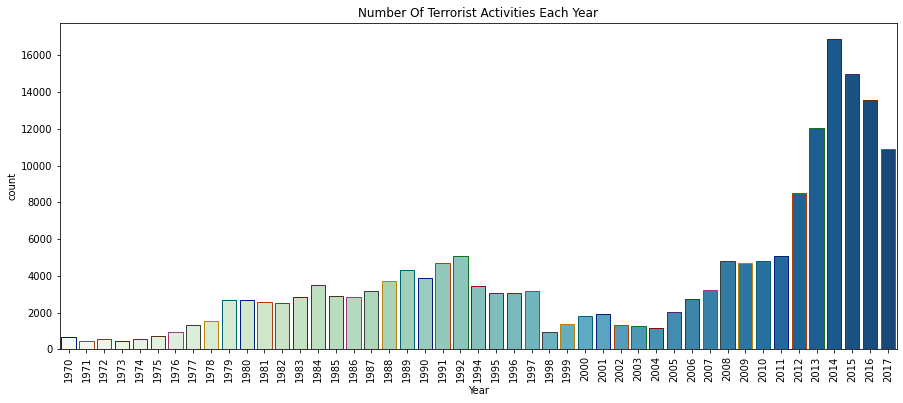

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='GnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Observation:
```
(i) Most number of attacks(16903) in 2014
(ii) Least number of attacks(471) in 1971
```

#### ii. Number of Casualties (Killed + Wounded) in each Year

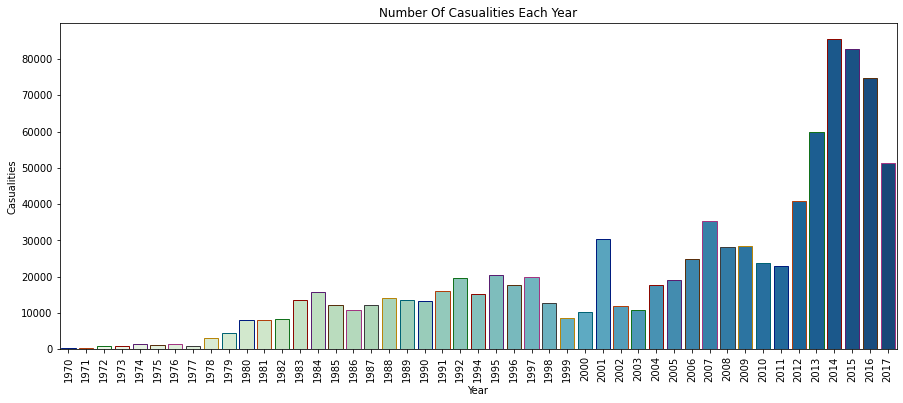

In [16]:
plt.subplots(figsize=(15,6))
year_cas = data.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette="GnBu",edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()  

### Observation:
```
(i) Most number of casualties: 85618 in 2014
(ii) Least number of casualties: 255 in 1971
```

### 2. Country wise Attacks [Top 15]

#### i. Number Of Total Attacks in Each Country

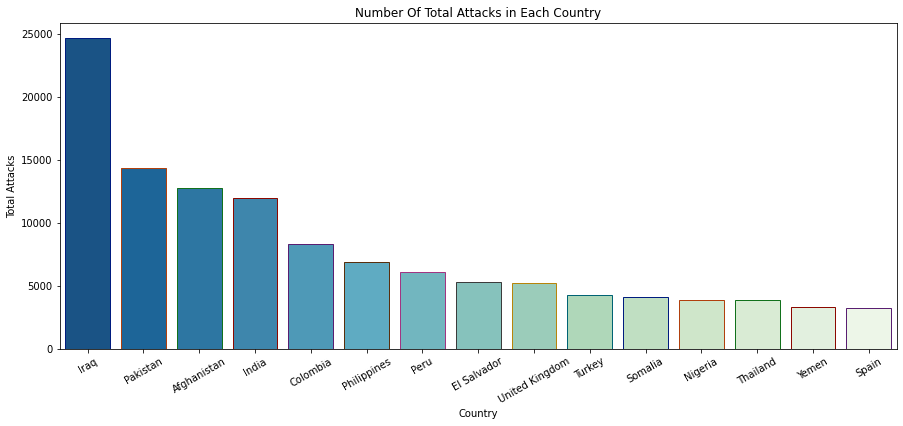

In [79]:
plt.subplots(figsize=(15,6))
country_attacks = data['Country'].value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'GnBu_r',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

### Observation:
```
(i) Most number of attacks: 24636 in "Iraq"
(ii) Least number of attacks: 3249 in "Spain"
```

#### ii. Number of Casualties (Killed + Wounded) in Country

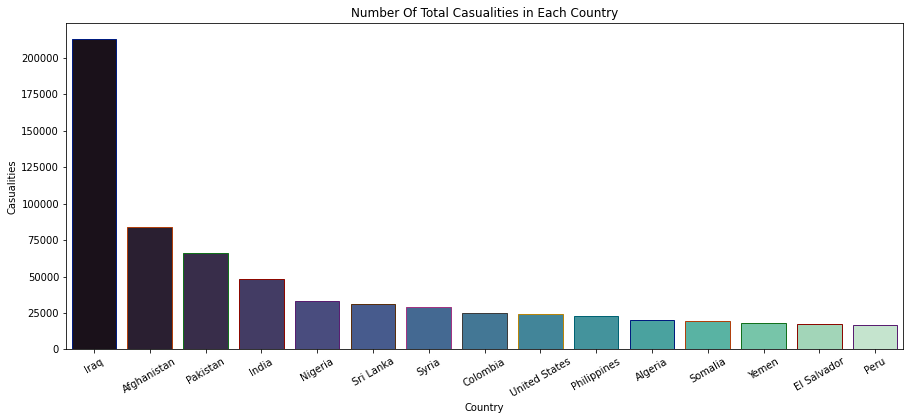

In [84]:
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'mako',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Casualities in Each Country')
plt.show()

### Observation:
```
(i) Most number of casualties: 213279 in "Iraq"
(ii) Least number of casualties: 16849 in "Peru"
```

### 3. Region wise Attacks 

#### i. Terrorist Activities by Region in each Year

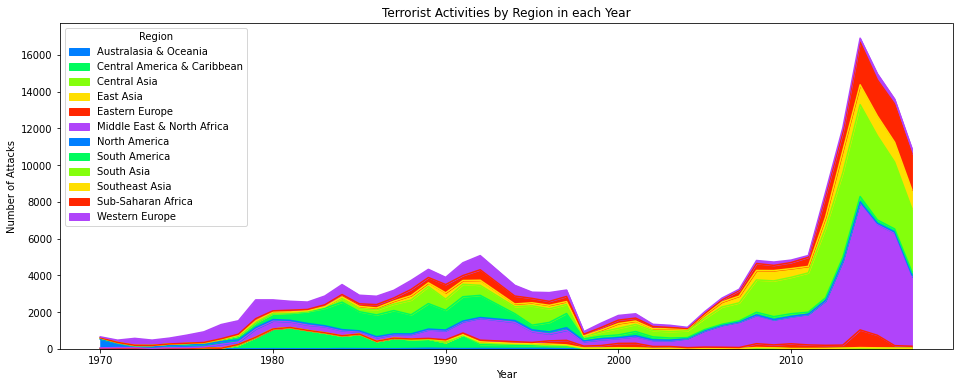

In [51]:
pd.crosstab(data['Year'], data['Region']).plot(kind='area',figsize=(16,6),color=sns.color_palette('gist_ncar'))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Observation:
```
(i)  Most number of attacks in "Middle East & North Africa" in each year
(ii) Least number of attacks "Australasia & Oceania" in each year
```

#### ii. Total Number Of Attacks in Each Region

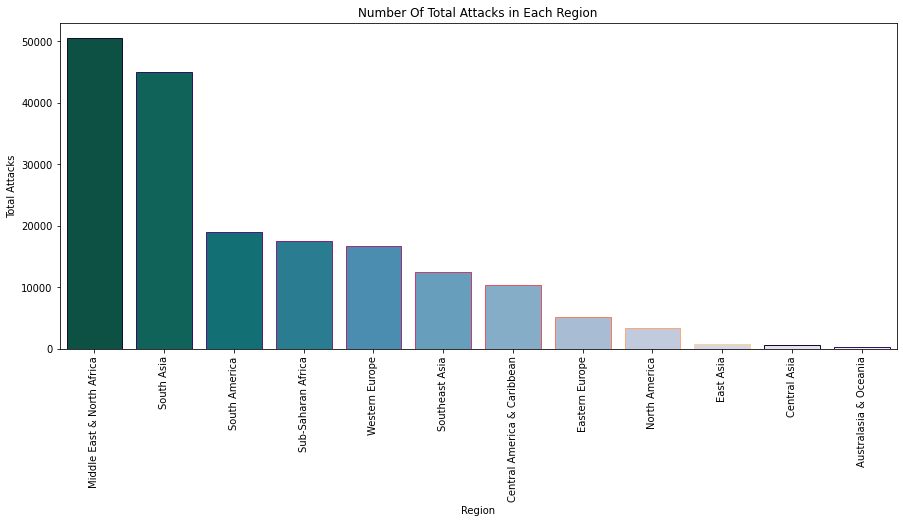

In [34]:
region_attacks = data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='PuBuGn_r', edgecolor=sns.color_palette('magma',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Region')
plt.show()

### Observation:
```
(i) Most number of attacks: 50474 in "Middle East & North Africa"
(ii) Least number of attacks: 282 in "Australasia & Oceania"
```

### 4. Total Number Of Attacks by Attack Type

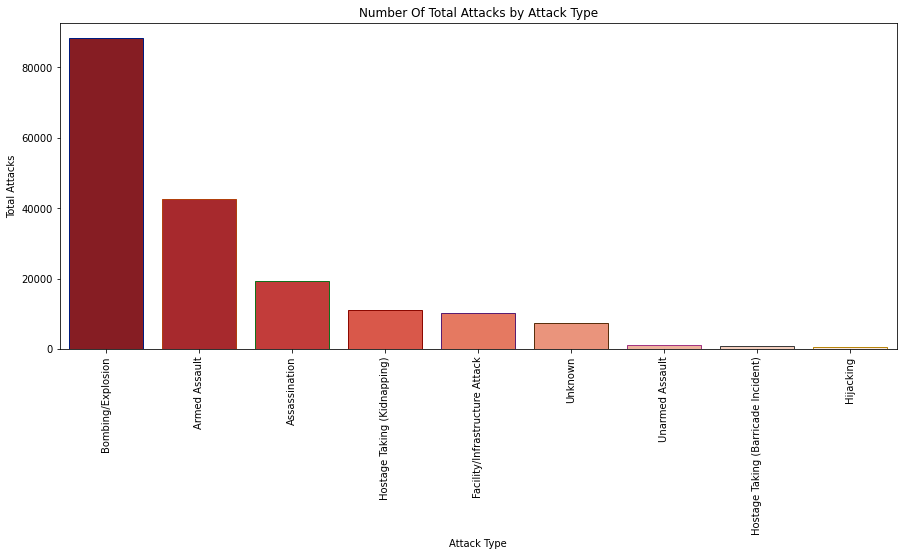

In [86]:
attack_type = data.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='Reds_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

### Observation:
```
(i) Most number of attacks : 88255 by "Bombing/Explosion"
(ii) Least number of attacks : 659 by "Hijacking"
```

### 5. Number Of Total Attacks and Casualities by city [Top20]

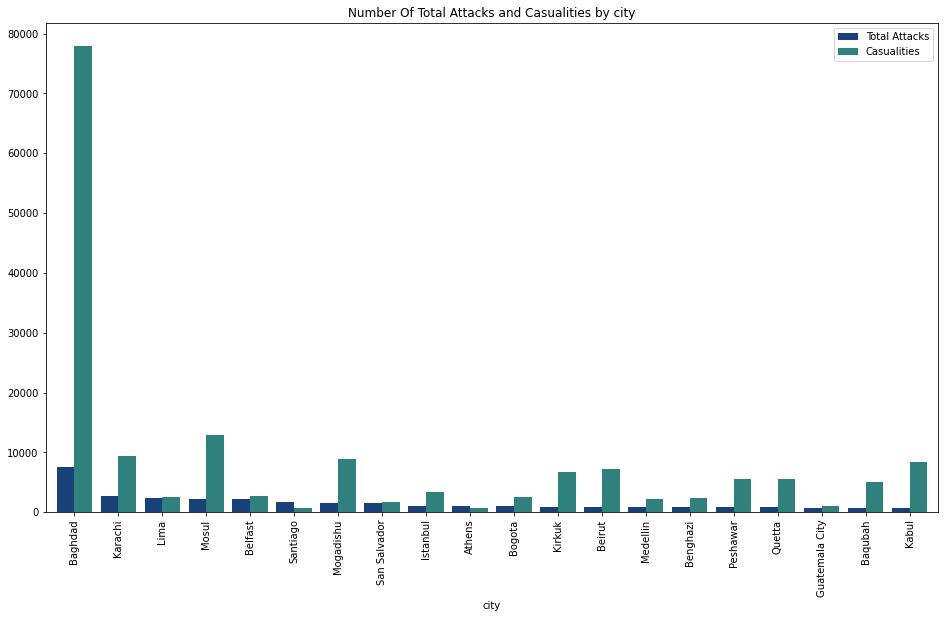

In [91]:
city_attacks = data.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['city', 'Total Attacks']
city_cas = data.groupby('city').Casualities.sum().to_frame().reset_index()
city_cas.columns = ['city', 'Casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]
sns.set_palette('gist_earth')
city_tot.plot.bar(x='city', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by city')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

### Observation:
```
(i) Most number of attack : 7589 and also very high Casualities : 77876 by baghdad city
```

### 6. Number Of Total Attacks by Terrorist Group [Top 16]

In [98]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


### Observation:
```
(i) Most number of attacks : 7478 by "Taliban" Terrorist Group
(ii) Least number of attacks : 1351 by "Tehrik-i-Taliban Pakistan (TTP)" Terrorist Group
```

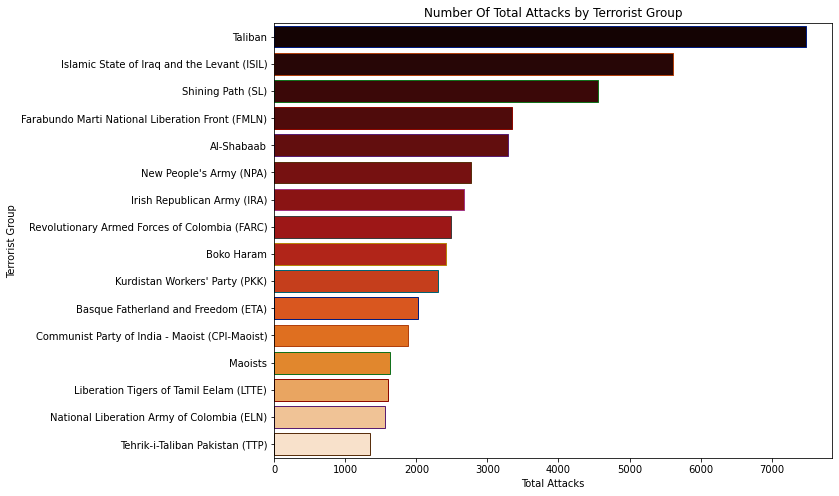

In [38]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='gist_heat',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

### Observation:
```
(i) Most number of attacks : 7478 by "Taliban" Terrorist Group
(ii) Least number of attacks : 1351 by "Tehrik-i-Taliban Pakistan (TTP)" Terrorist Group
```

### 7. Top Terrorist Groups Activities from 1970 to 2017

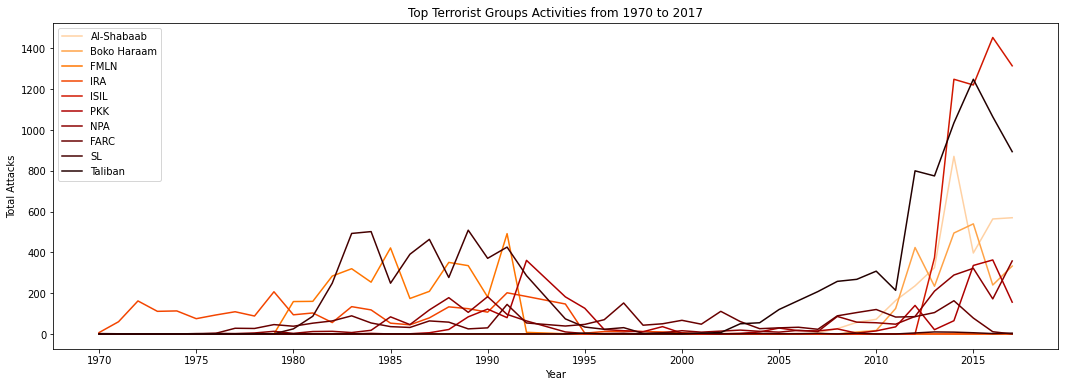

In [39]:
groups_10 = data[data.Group.isin(data.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('gist_heat_r', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

### Observation:
```
(i) Terrorist Groups Activities from Year 1982 - 1994 are Increasing and again
    slow down for year 1995 to 2010
(ii) Terrorist Groups Activities from Year 2011 - 2017 are Increasing Rapidly and they are
    countinlously increasing
```

### 8. Number of people killed by countries

In [43]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

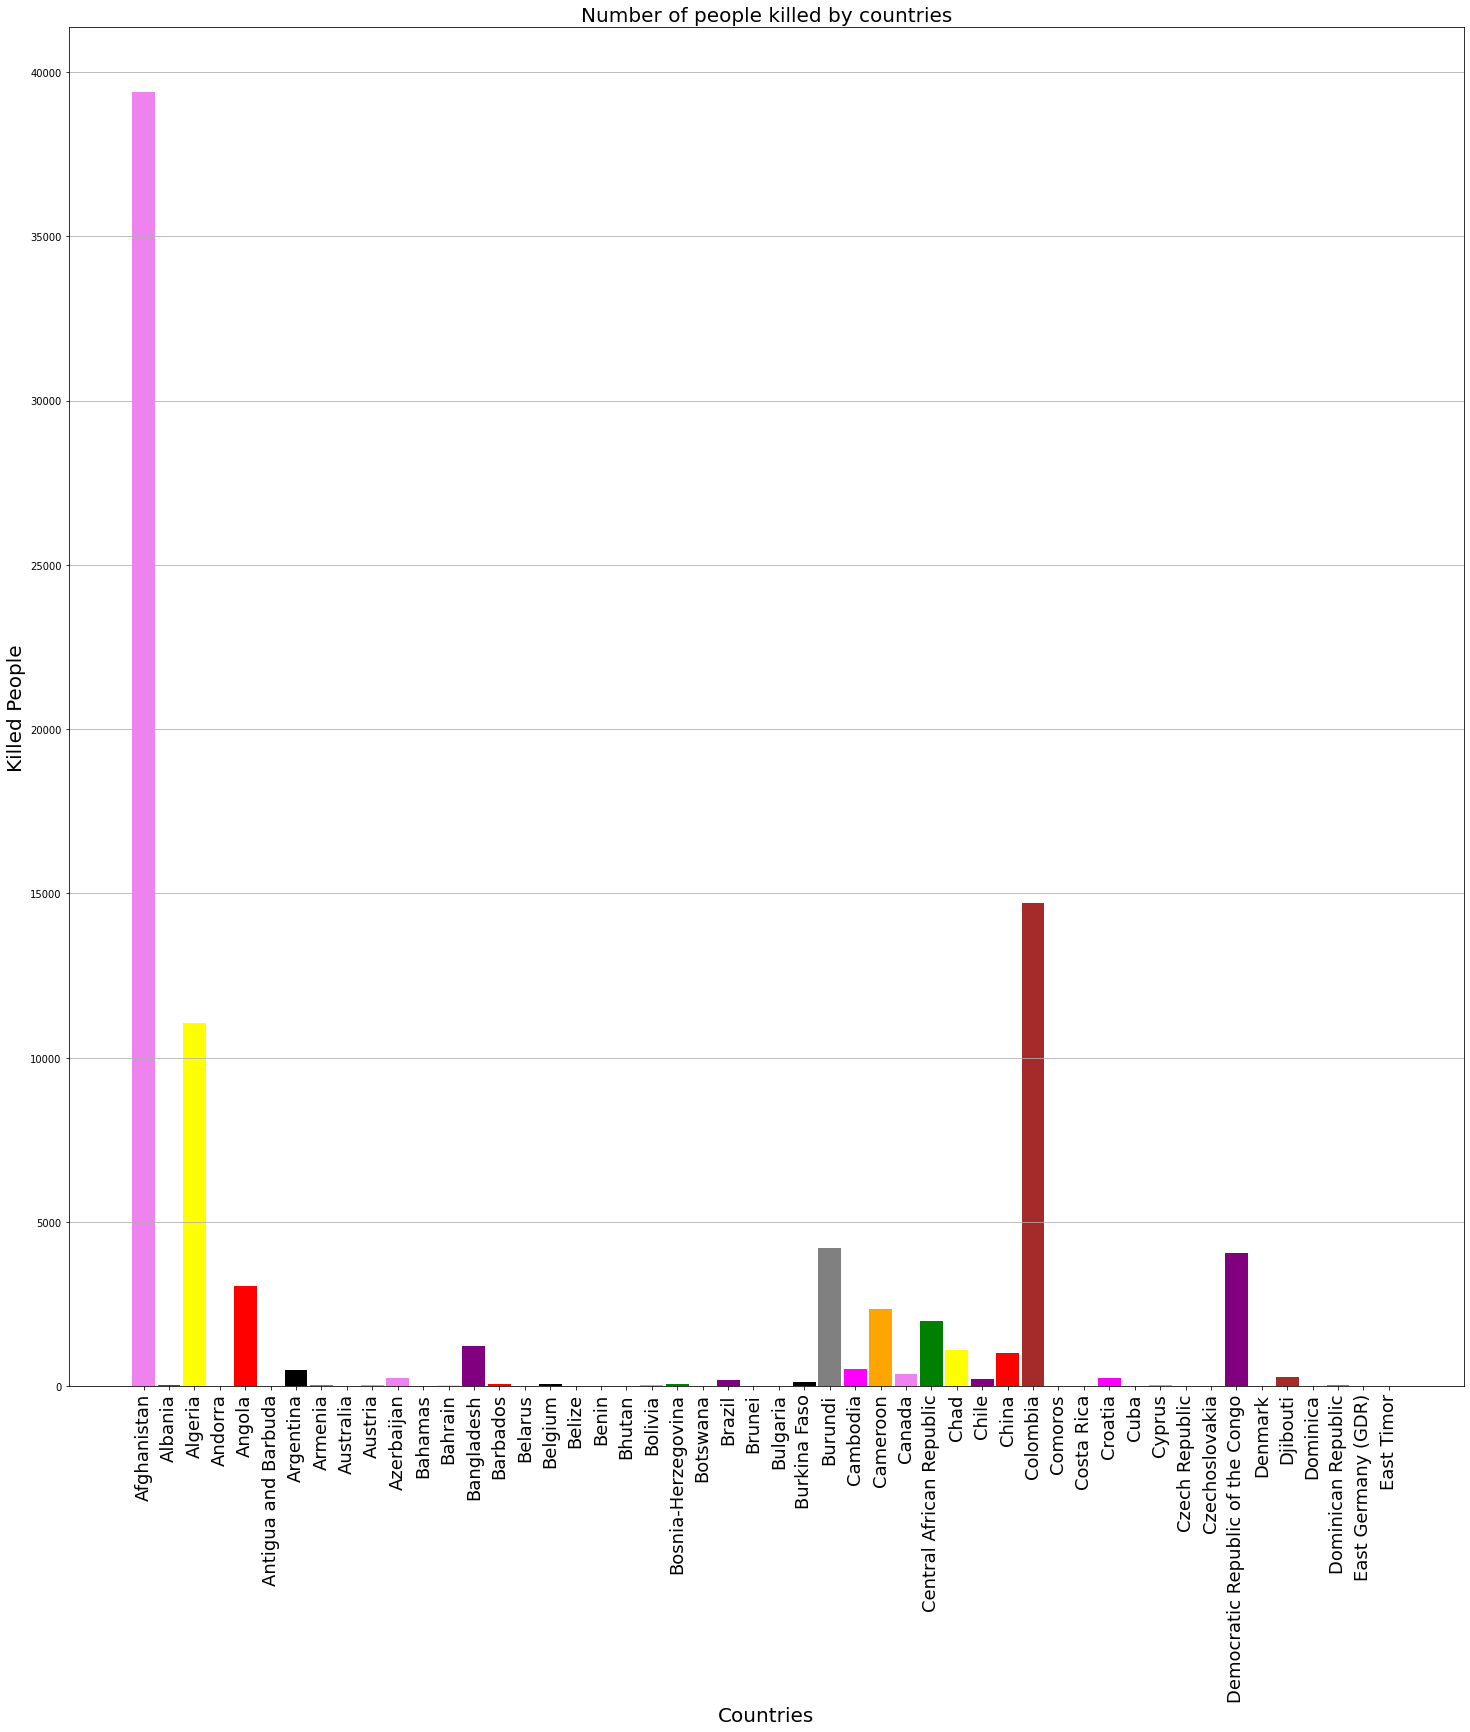

In [104]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['violet', 'green', 'yellow', 'purple', 'red', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

### Observation:
```
(i) Most Number Of People Killed : 39384 by Afhganistan Country
(ii) Zero Number Of People Killed by Benin, Brunei, Andorra, Antigua and Berbuda Countries
```

### 9. Number Of Total Attacks and Casualities by Target_type

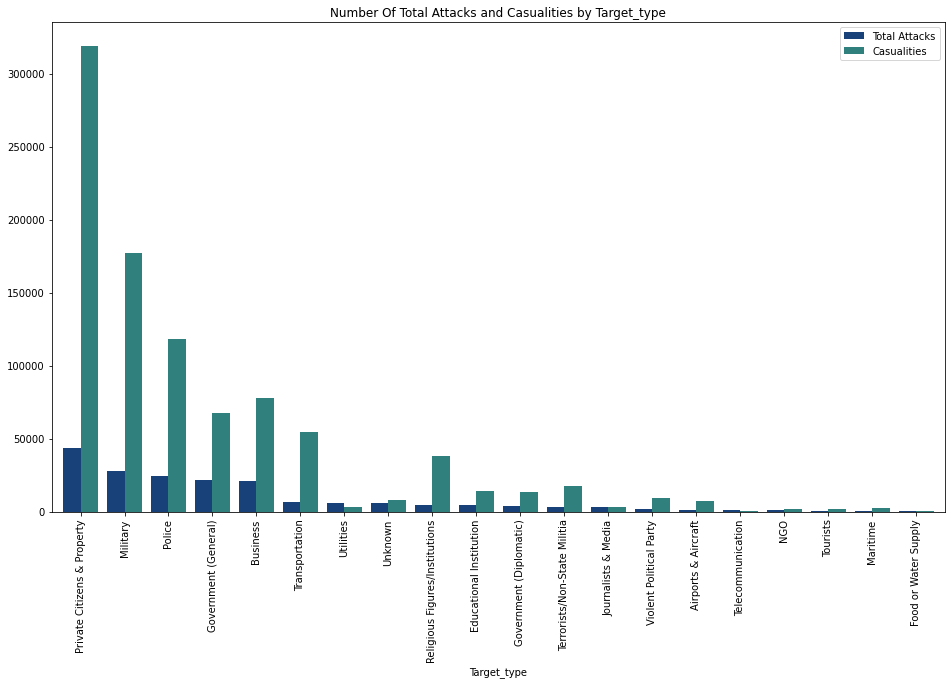

In [108]:
Target_type_attacks = data.Target_type.value_counts().to_frame().reset_index()
Target_type_attacks.columns = ['Target_type', 'Total Attacks']
Target_type_cas = data.groupby('Target_type').Casualities.sum().to_frame().reset_index()
Target_type_cas.columns = ['Target_type', 'Casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
Target_type_tot = pd.merge(Target_type_attacks, Target_type_cas, how='left', on='Target_type').sort_values('Total Attacks', ascending=False)[0:20]
sns.set_palette('gist_earth')
Target_type_tot.plot.bar(x='Target_type', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by Target_type')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

### Observation:
```
(i) Most number of attack : 43511 and also very high Casualities : 319176.0 
    by Private Citizens & Property Target type
```

In [ ]:
data.to_excel(r"E:/INTERNSHIP/SPARK FOUNDATION INTERNSHIP/Terrorism Data Analysis/globalterrorismdb.xlsx",index = False)